<a href="https://colab.research.google.com/github/kamangirkhan/Data/blob/main/ArashNateghian_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arash Nateghian**

●	Visit the News-API.org

o	Query the API for AI (artificial intelligent) related news from the past 30 days

o	Query the API for the latest news from today

o	Query the API for 2 additional topics of your choice

o	Create 2 charts of your choice presenting your findings from the API queries that you have just completed   


In [2]:
!pip install newsapi-python

from datetime import datetime, timedelta, timezone
from newsapi import NewsApiClient
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Initialize News API client
# -----------------------------
API_KEY = "YOUR_API_KEY_HERE"   # <-- REPLACE THIS
newsapi = NewsApiClient(api_key='cd857cec884846f1911f2666204391a9')

# Helper: today and last 30 days
today = datetime.now(timezone.utc).date()
from_30 = today - timedelta(days=30)

from_str = from_30.strftime("%Y-%m-%d")
to_str   = today.strftime("%Y-%m-%d")

print(f"Date range for 30-day queries: {from_str} to {to_str}")

Date range for 30-day queries: 2025-11-09 to 2025-12-09


In [3]:
# -----------------------------
# 2. Query 1 – AI-related news (last 30 days)
# -----------------------------
ai_query = '("artificial intelligence" OR AI)'

ai_resp = newsapi.get_everything(
    q=ai_query,
    language="en",
    from_param=from_str,
    to=to_str,
    sort_by="publishedAt",
    page_size=100,   # max per page for free tier
)

ai_articles = ai_resp.get("articles", [])
print(f"AI articles (last 30 days): {len(ai_articles)}")

AI articles (last 30 days): 100


In [4]:
# -----------------------------
# 3. Query 2 – Latest news today
#    (top headlines right now)
# -----------------------------
today_resp = newsapi.get_top_headlines(
    language="en",
    page_size=100
)

today_articles = today_resp.get("articles", [])
print(f"Top headlines (today): {len(today_articles)}")

Top headlines (today): 35


In [5]:
# -----------------------------
# 4. Query 3 & 4 – Two extra topics
#    You can change these strings if you want.
# -----------------------------
topic3 = "machine learning"
topic4 = "climate change"

topic3_resp = newsapi.get_everything(
    q=topic3,
    language="en",
    from_param=from_str,
    to=to_str,
    sort_by="publishedAt",
    page_size=100,
)
topic3_articles = topic3_resp.get("articles", [])
print(f'"{topic3}" articles (last 30 days): {len(topic3_articles)}')

topic4_resp = newsapi.get_everything(
    q=topic4,
    language="en",
    from_param=from_str,
    to=to_str,
    sort_by="publishedAt",
    page_size=100,
)
topic4_articles = topic4_resp.get("articles", [])
print(f'"{topic4}" articles (last 30 days): {len(topic4_articles)}')

"machine learning" articles (last 30 days): 100
"climate change" articles (last 30 days): 42


In [6]:
# -----------------------------
# 5. Put everything into one DataFrame
# -----------------------------
def articles_to_df(articles, topic_label):
    """Convert list of NewsAPI article dicts to a clean DataFrame."""
    if not articles:
        return pd.DataFrame(columns=["topic", "source", "title", "publishedAt", "url"])
    return pd.DataFrame(
        [
            {
                "topic": topic_label,
                "source": a.get("source", {}).get("name"),
                "title": a.get("title"),
                "publishedAt": a.get("publishedAt"),
                "url": a.get("url"),
            }
            for a in articles
        ]
    )

df_ai     = articles_to_df(ai_articles, "AI (30 days)")
df_today  = articles_to_df(today_articles, "Today headlines")
df_topic3 = articles_to_df(topic3_articles, topic3)
df_topic4 = articles_to_df(topic4_articles, topic4)

all_df = pd.concat([df_ai, df_today, df_topic3, df_topic4], ignore_index=True)

# Convert publishedAt to datetime for possible extra analysis
all_df["publishedAt"] = pd.to_datetime(all_df["publishedAt"], errors="coerce")

print("\nCombined DataFrame preview:")
print(all_df.head())


Combined DataFrame preview:
          topic          source  \
0  AI (30 days)   Niemanlab.org   
1  AI (30 days)   Niemanlab.org   
2  AI (30 days)   Niemanlab.org   
3  AI (30 days)  Financial Post   
4  AI (30 days)             BGR   

                                               title  \
0                    The newsroom’s AI has an agenda   
1  News gets reshaped to match the way your brain...   
2                AI turns the firehose into a funnel   
3  NextEra to Acquire Symmetry Energy to Expand i...   
4  Riyadh Air Is The World's First AI-Native Airl...   

                publishedAt                                                url  
0 2025-12-08 14:26:01+00:00  https://www.niemanlab.org/2025/12/the-newsroom...  
1 2025-12-08 14:25:57+00:00  https://www.niemanlab.org/2025/12/news-gets-re...  
2 2025-12-08 14:25:50+00:00  https://www.niemanlab.org/2025/12/ai-turns-the...  
3 2025-12-08 14:25:42+00:00  https://financialpost.com/pmn/business-pmn/nex...  
4 2025-12-08 14:25


Article counts by topic:
topic
AI (30 days)        100
machine learning    100
climate change       42
Today headlines      35
Name: title, dtype: int64


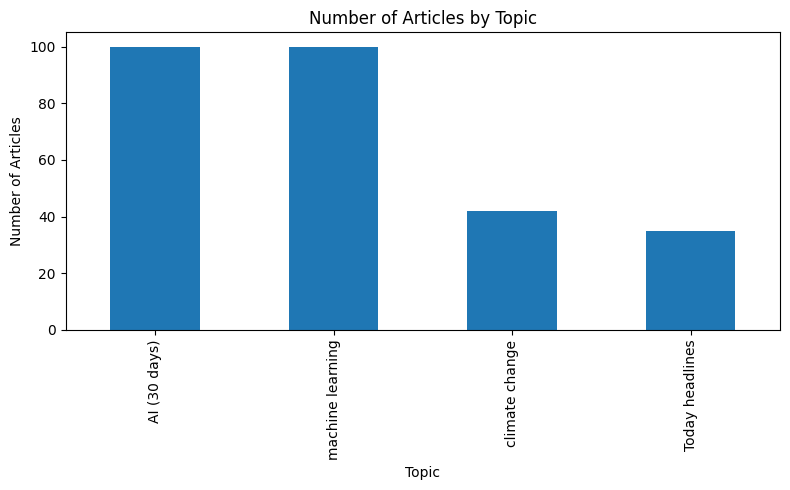

In [7]:
# =========================================================================
# 6. CHART 1 – Number of articles per topic (bar chart)
# =========================================================================
topic_counts = all_df.groupby("topic")["title"].count().sort_values(ascending=False)
print("\nArticle counts by topic:")
print(topic_counts)

plt.figure(figsize=(8, 5))
topic_counts.plot(kind="bar")
plt.title("Number of Articles by Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()


Top 5 sources for AI-related articles:
source
Biztoc.com        30
GlobeNewswire      8
Financial Post     7
Pypi.org           7
Niemanlab.org      5
Name: title, dtype: int64


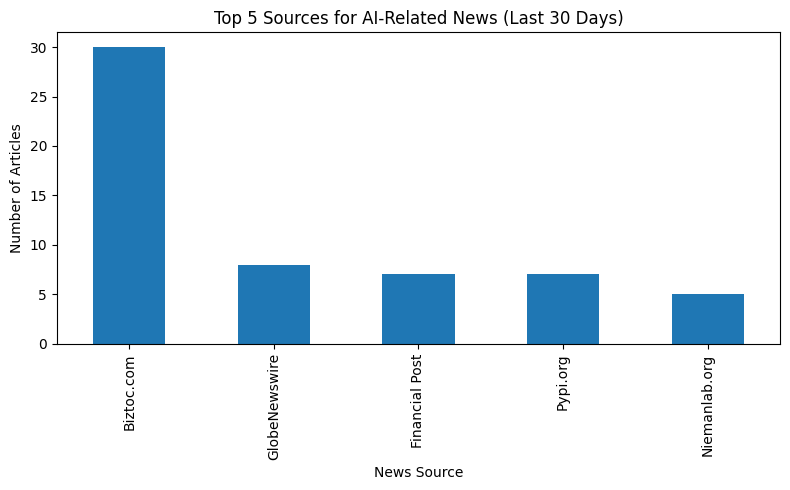

In [8]:
# =========================================================================
# 7. CHART 2 – Top sources for AI-related news (top 5)
# =========================================================================
ai_df_only = all_df[all_df["topic"] == "AI (30 days)"].copy()

if ai_df_only.empty:
    print("\nNo AI articles found – cannot build source chart.")
else:
    source_counts = (
        ai_df_only.groupby("source")["title"]
        .count()
        .sort_values(ascending=False)
        .head(5)
    )

    print("\nTop 5 sources for AI-related articles:")
    print(source_counts)

    plt.figure(figsize=(8, 5))
    source_counts.plot(kind="bar")
    plt.title("Top 5 Sources for AI-Related News (Last 30 Days)")
    plt.xlabel("News Source")
    plt.ylabel("Number of Articles")
    plt.tight_layout()
    plt.show()

●	Visit https://medium.com/codex/15-fun-and-interesting-apis-to-use-for-your-next-coding-project-in-2022-86a4ff3a2742

o	Select an API of your choice and query it for 5 “ relevant pieces of information” (of your choice)

o	Create 2 Wordclouds of your choices showcasing your findings

o	You are here to learn more about the API – Select an API that’s most interesting for you


In [10]:
!pip install requests pandas wordcloud matplotlib
import sys
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ------------------------------------
# 1. Configuration
# ------------------------------------
API_KEY = "fc733a3e12549ad9b34a27b0bfe4813e"   # <-- put your key here, NO curly braces

base_url = "https://api.openweathermap.org/data/2.5/weather"

# A list of cities to query (you can change/add/remove)
cities = [
    "Tehran,IR",
    "Helsinki,FI",
    "Berlin,DE",
    "New York,US",
    "Tokyo,JP",
    "Dubai,AE",
    "Sydney,AU",
    "Toronto,CA",
    "London,GB",
    "Paris,FR"
]

In [11]:
# ------------------------------------
# 2. Function to call the API
# ------------------------------------
def get_weather(city_name):
    """Call OpenWeather current weather endpoint for a city."""
    params = {
        "q": city_name,
        "appid": API_KEY,
        "units": "metric"   # Celsius
    }
    resp = requests.get(base_url, params=params, timeout=10)
    resp.raise_for_status()  # will raise HTTPError for non-200
    return resp.json()

In [12]:
# ------------------------------------
# 3. Collect data for all cities
# ------------------------------------
records = []

for city in cities:
    try:
        data = get_weather(city)
    except Exception as e:
        print(f"Failed for {city}: {e}")
        continue

    # Defensive parsing
    name  = data.get("name")
    main  = data.get("main", {})
    wind  = data.get("wind", {})
    weath = data.get("weather", [])

    temp       = main.get("temp")
    feels_like = main.get("feels_like")
    humidity   = main.get("humidity")
    wind_speed = wind.get("speed")
    desc       = weath[0].get("description") if weath else None

    records.append({
        "city": name,
        "temp_C": temp,
        "feels_like_C": feels_like,
        "humidity": humidity,
        "wind_speed": wind_speed,
        "description": desc
    })

df = pd.DataFrame(records)
print("Collected rows:", len(df))
print(df)

if df.empty:
    raise SystemExit("No data collected – check your API key or network.")

Collected rows: 10
       city  temp_C  feels_like_C  humidity  wind_speed      description
0    Tehran   13.73         12.23        41        2.06             haze
1  Helsinki    5.29          0.99        93        6.71    broken clouds
2    Berlin   11.67         11.40        96        2.06       light rain
3  New York   -5.18         -9.24        49        2.57            smoke
4     Tokyo    8.22          6.66        49        2.57        clear sky
5     Dubai   26.96         27.38        50        4.12        clear sky
6    Sydney   20.35         20.56        81        9.77  overcast clouds
7   Toronto   -3.87        -10.87        63        7.72  overcast clouds
8    London   13.79         13.31        80        5.81  overcast clouds
9     Paris   15.36         14.81        71        7.72        clear sky


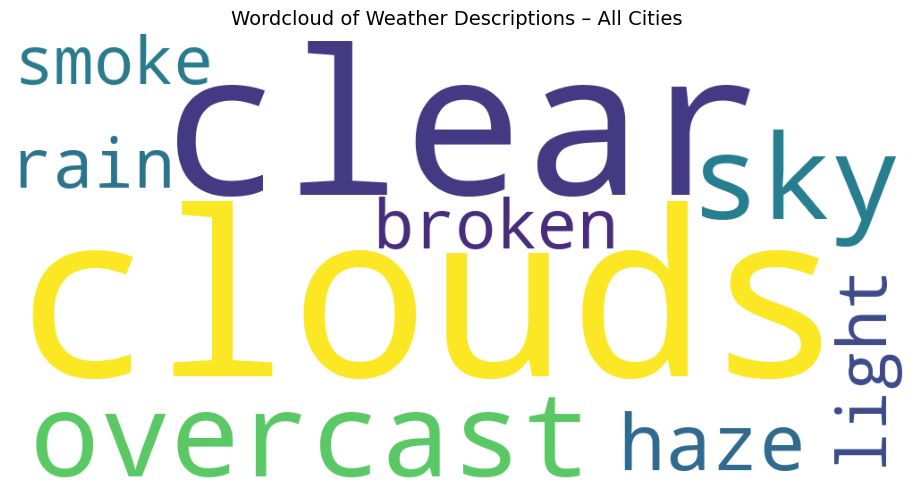

In [13]:
# ------------------------------------
# 4. WORDCLOUD 1 – all descriptions
# ------------------------------------
all_text = " ".join(df["description"].dropna().astype(str))

wc_all = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc_all)
plt.axis("off")
plt.title("Wordcloud of Weather Descriptions – All Cities", fontsize=14)
plt.tight_layout()
plt.show()



Cold cities (temp <= 5°C):
       city  temp_C      description
3  New York   -5.18            smoke
7   Toronto   -3.87  overcast clouds

Warm cities (temp >= 20°C):
     city  temp_C      description
5   Dubai   26.96        clear sky
6  Sydney   20.35  overcast clouds


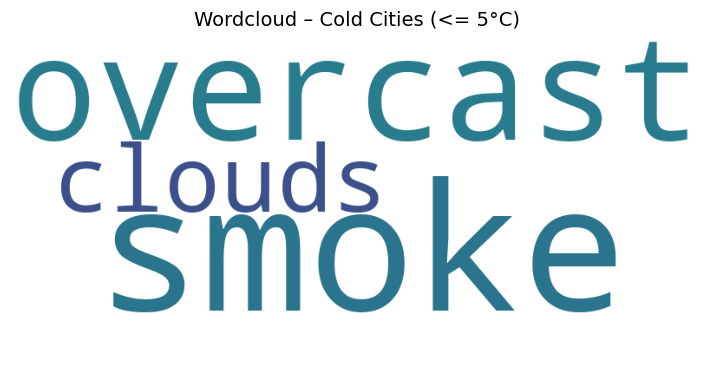

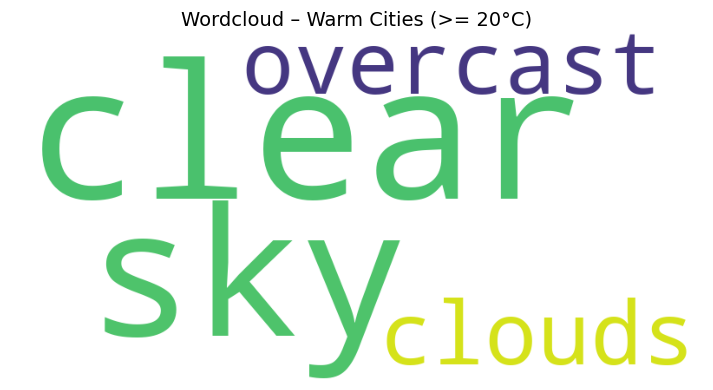

In [14]:
# ------------------------------------
# 5. WORDCLOUD 2 – cold vs warm cities
#    cold: temp_C <= 5
#    warm: temp_C >= 20
# ------------------------------------
cold = df[df["temp_C"] <= 5]
warm = df[df["temp_C"] >= 20]

print("\nCold cities (temp <= 5°C):")
print(cold[["city", "temp_C", "description"]])

print("\nWarm cities (temp >= 20°C):")
print(warm[["city", "temp_C", "description"]])

cold_text = " ".join(cold["description"].dropna().astype(str))
warm_text = " ".join(warm["description"].dropna().astype(str))

# Wordcloud – cold cities
if cold_text.strip():
    wc_cold = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=150
    ).generate(cold_text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wc_cold)
    plt.axis("off")
    plt.title("Wordcloud – Cold Cities (<= 5°C)", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No cold cities for the chosen threshold.")

# Wordcloud – warm cities
if warm_text.strip():
    wc_warm = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=150
    ).generate(warm_text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wc_warm)
    plt.axis("off")
    plt.title("Wordcloud – Warm Cities (>= 20°C)", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No warm cities for the chosen threshold.")

**Learning Experience**

The biggest lesson from this project was understanding the difference between what an API can theoretically provide and what my own API key actually gives me access to. I wasted time initially trying to use historical weather endpoints that are not available in the free tier. This forced me to understand API documentation more carefully, especially around access levels, rate limits, and endpoint differences.

I also learned how important it is to validate assumptions with real responses, not just read the documentation. Seeing repeated 401 errors made it clear that even correct code fails when an API key does not support the endpoint.

From the NewsAPI portion, I learned how flexible API queries can be when filtering by date range, topic, and language. This gave me a better understanding of how news datasets can be shaped and analyzed depending on the questions I want to answer.

Finally, building visualizations (both the charts and the wordclouds) helped me see how raw data becomes meaningful only when presented in a way that highlights relationships or contrasts. The wordclouds, especially, showed me how textual data can convey patterns that would be hard to notice by reading individual responses.